# Tarea 1 - Daniel Enríquez
## Laboratorio de Electrónica Digital - 202308323

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors


### Ejemplo 1

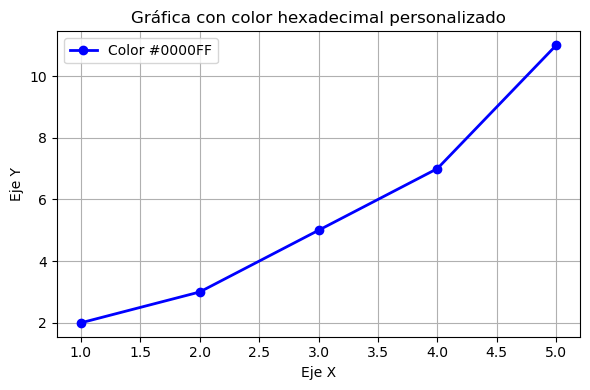

In [28]:
# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Color personalizado en hexadecimal
hex_color = "#0000FF"  # Azul

# Crear gráfica
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', color=hex_color, linewidth=2, label=f"Color {hex_color}")
plt.title("Gráfica con color hexadecimal personalizado")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.tight_layout()


#### Ejemplo 2

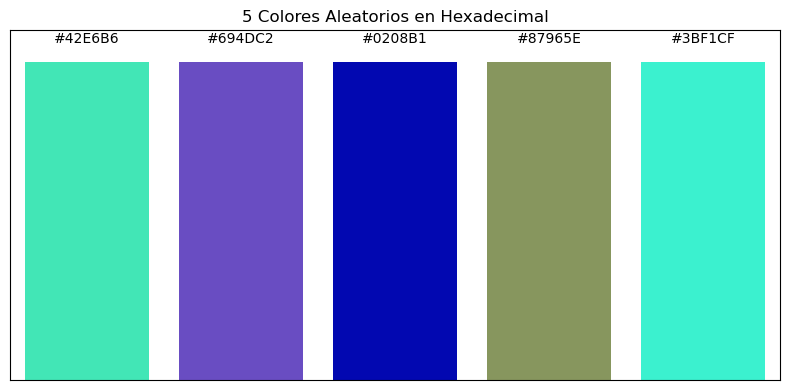

In [4]:
def generate_random_hex_color():
    return "#{:06X}".format(random.randint(0, 0xFFFFFF))

# Generar 5 colores aleatorios
colors = [generate_random_hex_color() for _ in range(5)]

# Graficar como barras de colores
plt.figure(figsize=(8, 4))
for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)
    plt.text(i, 1.05, color, ha='center', va='bottom', fontsize=10)
    
plt.xticks([])
plt.yticks([])
plt.title("5 Colores Aleatorios en Hexadecimal")
plt.xlim(-0.5, 4.5)
plt.ylim(0, 1.1)
plt.tight_layout()

Ejemplo de uso de codificacion hexadecimal del color , se quiere representar la distribución de temperatura en una placa usando colores, internamente, matplotlib traduce cada valor numérico a un código RGB/hex para generar la imagen.

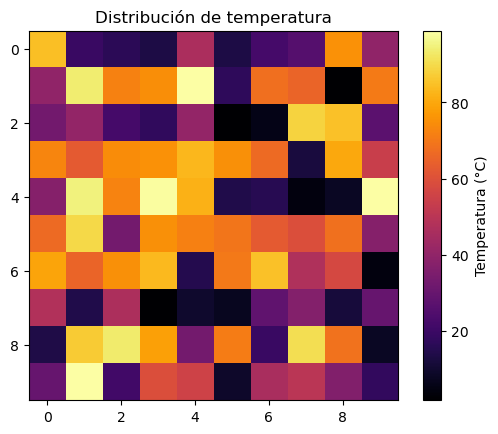

In [6]:

temperatura = np.random.rand(10, 10) * 100  # Temperaturas entre 0 y 100 °C
plt.imshow(temperatura, cmap='inferno')     # Mapa de color inferno (RGB)
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de temperatura")
plt.show()

## Tarea 1
Generar un mapa de color personalizado a partir de un color hexadecimal base

### Instrucciones:
1. Define un color base en formato hexadecimal, por ejemplo `#66ccff` (azul claro).
2. Genera con numpy una matriz de valores aleatorios entre 0 y 1 (por ejemplo de 10x10).
3. Completa la función `darken_color` , que cumpla las siguientes caracteristicas:
   - Reciba un valor entre 0 y 1.
   - Devuelva un color más oscuro que el color base, en función del valor recibido.
     * A mayor valor, más oscuro el color.
5. Aplica tu función a cada valor para obtener una matriz de colores personalizados.
6. Muestra la matriz de colores como una imagen (`imshow` de matplotlib), sin usar colormaps predefinidos.
7. Bonus: agrega una barra de color personalizada o una leyenda.

### Requisitos:
- Trabajar con el formato de color hexadecimal.
- No usar cmap de Matplotlib (se construye a mano).
- Usar `matplotlib.colors.to_rgb` y `matplotlib.colors.to_hex` puede ayudarte.


In [8]:
# Paso 1: color base
# Define el color base
base_hex = "#00FF9A"
base_rgb = np.array(mcolors.to_rgb(base_hex))

Que hace la función `to_rgb`?

$\rightarrow$ Convierte el código proporcionado a una tupla de tres números $(n, m, z)$ cuales representan a los colores: azul, rojo y anaranjado.

In [25]:
# Paso 2: generar datos, generamos una matriz de datos aleatorios
data = np.random.rand(10,10)

In [26]:
print(data)

[[0.15829902 0.16165473 0.56337481 0.55700576 0.47526096 0.27671016
  0.10921455 0.70792936 0.64774569 0.67967216]
 [0.21105001 0.12974375 0.67653663 0.58465551 0.21350307 0.96622366
  0.38911227 0.12368188 0.91226842 0.48458076]
 [0.84816513 0.76369714 0.13303479 0.54436563 0.96703594 0.36924203
  0.63330098 0.96187256 0.74034016 0.37231973]
 [0.70707504 0.33555097 0.91095029 0.96482537 0.93062682 0.36172115
  0.54318332 0.31431815 0.82880431 0.92823318]
 [0.1194674  0.92909867 0.83022455 0.55112354 0.56285373 0.44751345
  0.32442808 0.76977262 0.2919823  0.78994446]
 [0.91679165 0.91729287 0.48051034 0.15269565 0.29568333 0.31139577
  0.96472202 0.51471598 0.4287433  0.55504275]
 [0.68069539 0.21970784 0.75481032 0.6736368  0.05455028 0.71279678
  0.44211032 0.91034276 0.0407921  0.41200003]
 [0.93949868 0.13778885 0.38102051 0.45635406 0.22556963 0.05177139
  0.03605496 0.0976404  0.54940332 0.01091584]
 [0.26903973 0.18228891 0.33741807 0.44365475 0.54911809 0.71070549
  0.25882925

In [35]:
## Paso 3: definimos una funcion para oscurecer el color base dependiendo de el valor 
def darken_color(value, base_color):

    if 0 <= value <= 1:
            darkened = (1 - value) * base_color
    """
    value: float entre 0 (sin cambio) y 1 (oscuro)
    base_color: array RGB (valores entre 0 y 1)
    """
    return mcolors.to_hex(darkened)

In [36]:
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)
color_matrix

array([['#00d782', '#00d681', '#006f43', '#007144', '#008651', '#00b86f',
        '#00e389', '#004a2d', '#005a36', '#005231'],
       ['#00c979', '#00de86', '#005232', '#006a40', '#00c979', '#000905',
        '#009c5e', '#00df87', '#00160e', '#00834f'],
       ['#002717', '#003c24', '#00dd86', '#007446', '#000805', '#00a161',
        '#005e38', '#000a06', '#004228', '#00a061'],
       ['#004b2d', '#00a966', '#00170e', '#000905', '#00120b', '#00a362',
        '#007446', '#00af6a', '#002c1a', '#00120b'],
       ['#00e188', '#00120b', '#002b1a', '#007245', '#006f43', '#008d55',
        '#00ac68', '#003b23', '#00b56d', '#003620'],
       ['#00150d', '#00150d', '#008450', '#00d882', '#00b46c', '#00b06a',
        '#000905', '#007c4b', '#009258', '#007145'],
       ['#005131', '#00c778', '#003f26', '#005332', '#00f192', '#00492c',
        '#008e56', '#00170e', '#00f594', '#00965b'],
       ['#000f09', '#00dc85', '#009e5f', '#008b54', '#00c577', '#00f292',
        '#00f694', '#00e68b', '#00734

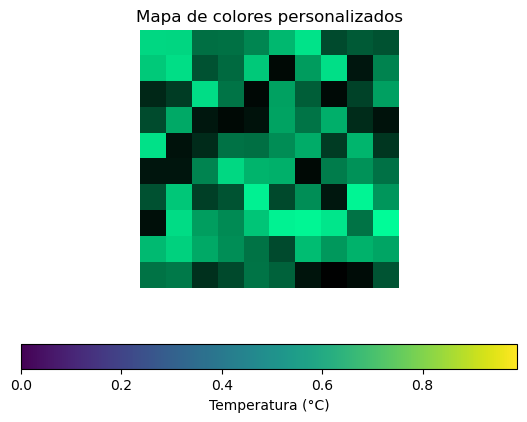

In [39]:
# Paso 4: generar imagen de colores
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)

# Paso 5: convertir a imagen RGB
rgb_matrix = np.array([[mcolors.to_rgb(color) for color in row] for row in color_matrix])

# Paso 6: mostrar
plt.imshow(rgb_matrix)
plt.colorbar(label='Temperatura (°C)', orientation='horizontal')
plt.title("Mapa de colores personalizados")
plt.axis('off')
plt.show()